In [ ]:
import torch
x = torch.Tensor(3, 4).cuda()
print(x)

tensor([[3.2164e+07, 0.0000e+00, 4.3066e+21, 6.3828e+28],
        [2.1754e+07, 0.0000e+00, 2.1755e+07, 0.0000e+00],
        [2.1755e+07, 0.0000e+00, 2.1756e+07, 0.0000e+00]], device='cuda:0')


In [ ]:
# !pip install mxnet
# !pip install gluonnlp pandas tqdm
# !pip install sentencepiece
# !pip install transformers==3.0.2
# !pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 28.6 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=619634 sha256=2d54becda144335e92257263966be73dae979780dc710b9e11c8786ac10da6e3
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 27.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [ ]:
# KoBERT
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-1p0klvhw
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-1p0klvhw
     |████████████████████████████████| 129 kB 27.2 MB/s 
     |████████████████████████████████| 54.7 MB 1.1 MB/s 
     |████████████████████████████████| 4.5 MB 78.9 MB/s 
     |████████████████████████████████| 1.2 MB 84.6 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:43tcmalloc: large alloc 1147494400 bytes == 0x39684000 @  0x7f77a5877615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████████████████| 881.9 MB

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook



# KoBERT
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
# Transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
# GPU
device = torch.device("cuda:0")
# BERT model, Vocabulary
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
def print_plot(data, label):
    n_total = len(data)
    n_zero = len(data.query(label + ' == 0'))
    n_one = len(data.query(label + ' == 1'))

    print("label 0 : {}개, {:.2f}%".format(n_zero, n_zero*100/n_total))
    print("label 1 : {}개, {:.2f}%\n".format(n_one, n_one*100/n_total))

    values = data[label].value_counts()
    values.plot(kind='bar')
    print(values)

In [ ]:
df_senti = pd.read_excel('/content/drive/MyDrive/202212/Senti_multiclassification_m3.xlsx')
df_senti

,Unnamed: 0,document,Despair,Angry,Mockery,GiveUp,Positive,Sentimental,Senti
0,0,닭들이 알낳으면 양계장 주인만 존나 좋아하지않냐? 그게 딱 한국 현실이여,0,0,1,0,0,3,Mockery
1,1,나는 평생 집은 커녕 화장실도 못살꺼같으니 많이 해드신 LH직원분들이랑 국회위원분들...,0,0,0,0,1,5,Positive
2,2,육아휴직이나 받아주던가 경력단절이나 없던가 월급이나 많던가 교육비나 적던가 내집마련...,0,0,0,0,1,5,Positive
3,3,나라가 망하는게 문제가 아니라내가 죽게 생겼다,1,0,0,0,0,1,Despair
4,4,현재: 제발 애좀 낳으세요 물론 양육비는 처음부터 끝까지 느그가 알아서 하셈 ^^,0,1,0,0,0,2,Angry
...,...,...,...,...,...,...,...,...,...
89596,89596,댓글들 애 안 낳는걸로 시위하나ㅋㅋㅋㅋ꼬라지 봐라,0,0,1,0,0,3,Mockery
89597,89597,뭔가 오해하는 사람이 많아보이는데... 해당 뉴스 클립에선 돈이 전부가 아니니까 불...,0,0,0,0,1,5,Positive
89598,89598,나만 근본원인을 알지.ㅋㅋ 공무원들은 몰라. 자기들 연금때문에 모른척하나?,0,0,1,0,0,3,Mockery
89599,89599,@집가고싶다 집 값 너무 비싸서 못사서요ㅠㅠ.. 그래서 결혼 안함..ㅋㅋㅋ......,0,1,0,0,0,2,Angry


In [ ]:
df_ = df_senti[['document','Sentimental']]
df_

,document,Sentimental
0,닭들이 알낳으면 양계장 주인만 존나 좋아하지않냐? 그게 딱 한국 현실이여,3
1,나는 평생 집은 커녕 화장실도 못살꺼같으니 많이 해드신 LH직원분들이랑 국회위원분들...,5
2,육아휴직이나 받아주던가 경력단절이나 없던가 월급이나 많던가 교육비나 적던가 내집마련...,5
3,나라가 망하는게 문제가 아니라내가 죽게 생겼다,1
4,현재: 제발 애좀 낳으세요 물론 양육비는 처음부터 끝까지 느그가 알아서 하셈 ^^,2
...,...,...
89596,댓글들 애 안 낳는걸로 시위하나ㅋㅋㅋㅋ꼬라지 봐라,3
89597,뭔가 오해하는 사람이 많아보이는데... 해당 뉴스 클립에선 돈이 전부가 아니니까 불...,5
89598,나만 근본원인을 알지.ㅋㅋ 공무원들은 몰라. 자기들 연금때문에 모른척하나?,3
89599,@집가고싶다 집 값 너무 비싸서 못사서요ㅠㅠ.. 그래서 결혼 안함..ㅋㅋㅋ......,2


In [ ]:
df_senti.columns

Index(['Unnamed: 0', 'document', 'Despair', 'Angry', 'Mockery', 'GiveUp',
       'Positive', 'Sentimental', 'Senti'],
      dtype='object')

In [ ]:
print('=====================================================')
print(df_senti['Sentimental'].value_counts())
print('=====================================================')

print(df_senti['Despair'].value_counts())
print('=====================================================')
print(df_senti['Angry'].value_counts())
print('=====================================================')
print(df_senti['Mockery'].value_counts())
print('=====================================================')
print(df_senti['GiveUp'].value_counts())
print('=====================================================')
print(df_senti['Positive'].value_counts())

2    36824
3    31056
5    13226
1     4913
4     3582
Name: Sentimental, dtype: int64
0    84688
1     4913
Name: Despair, dtype: int64
0    52777
1    36824
Name: Angry, dtype: int64
0    58545
1    31056
Name: Mockery, dtype: int64
0    86019
1     3582
Name: GiveUp, dtype: int64
0    76375
1    13226
Name: Positive, dtype: int64


In [ ]:
df_.columns = ['document','label']
df_

,document,label
0,닭들이 알낳으면 양계장 주인만 존나 좋아하지않냐? 그게 딱 한국 현실이여,3
1,나는 평생 집은 커녕 화장실도 못살꺼같으니 많이 해드신 LH직원분들이랑 국회위원분들...,5
2,육아휴직이나 받아주던가 경력단절이나 없던가 월급이나 많던가 교육비나 적던가 내집마련...,5
3,나라가 망하는게 문제가 아니라내가 죽게 생겼다,1
4,현재: 제발 애좀 낳으세요 물론 양육비는 처음부터 끝까지 느그가 알아서 하셈 ^^,2
...,...,...
89596,댓글들 애 안 낳는걸로 시위하나ㅋㅋㅋㅋ꼬라지 봐라,3
89597,뭔가 오해하는 사람이 많아보이는데... 해당 뉴스 클립에선 돈이 전부가 아니니까 불...,5
89598,나만 근본원인을 알지.ㅋㅋ 공무원들은 몰라. 자기들 연금때문에 모른척하나?,3
89599,@집가고싶다 집 값 너무 비싸서 못사서요ㅠㅠ.. 그래서 결혼 안함..ㅋㅋㅋ......,2


label 크기 :  89601
2    36824
3    31056
5    13226
1     4913
4     3582
Name: label, dtype: int64
label 0 : 0개, 0.00%
label 1 : 4913개, 5.48%

2    36824
3    31056
5    13226
1     4913
4     3582
Name: label, dtype: int64


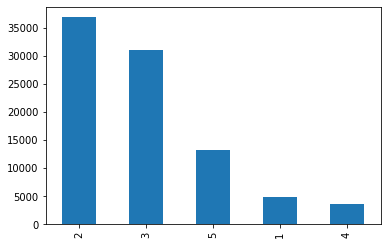

In [ ]:
print('label 크기 : ',len(df_))
print(df_['label'].value_counts())
print_plot(df_, 'label')

In [ ]:
df_fr = df_senti.sample(frac=1).reset_index(drop=True)
df_fr

,Unnamed: 0,document,Despair,Angry,Mockery,GiveUp,Positive,Sentimental,Senti
0,7390,"그러게요, 실제로 저는 최근 전세무슨 법 생기기 1년전쯤에 결혼안한 20대직장인한테...",0,1,0,0,0,2,Angry
1,61688,법부터 개정 후에 애를 낳아라 마라 해라.. 법이 그지같음서 먼 자꾸 애를 나으래ㅡ...,0,0,0,0,1,5,Positive
2,2365,그냥 통계치잖아..;;남자는 그럼 나라지키는 기계냐?여성부는 해체가 답.,0,1,0,0,0,2,Angry
3,36123,@Jsoul 지금 사회는 성별과 세대별로 이익집단이 나눠져있어서100% 국민들끼...,1,0,0,0,0,1,Despair
4,43159,@대람지 정보 감사합니다0 84명이라뉘ㅠ,0,0,1,0,0,3,Mockery
...,...,...,...,...,...,...,...,...,...
89596,54247,앵커 코로나19가 겹치면서 출산율이 떨어졌다는건 뭔 개소리냐? 좀 전문앵커 세워놔라,0,1,0,0,0,2,Angry
89597,35985,@Titanium Dioxide 뉴스 좀 봐라 꼰대새끼야...;;;;,0,0,1,0,0,3,Mockery
89598,60025,안그래도 사람 넘쳐남,0,0,0,1,0,4,GiveUp
89599,9226,ㄱㅊ 인구붕괴되면 여성만 힘들어짐,0,0,1,0,0,3,Mockery


In [ ]:
data_list = []

for q, label in zip(df_fr['document'], df_fr['Positive'])  :
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
print(data_list[0])
print(data_list[6000])
print(data_list[12000])
print(data_list[18000])
print(data_list[24000])
print(data_list[30000])
print(data_list[-1])

['그러게요, 실제로 저는 최근 전세무슨 법 생기기 1년전쯤에 결혼안한 20대직장인한테 이자율 엄청 좋게 전세대출해준다길래 막상 알아보고 신청하려고보니 조건 존나따져서 결국 대출못함...ㅋ........', '0']
['아니 210조 썼으면서 출산률이 마이너스네 진짜 니들 그 자리에 어떻게 앉아있냐 무능한걸 넘어섰는데', '0']
['K-자살에 전 세계가 경악했다', '0']
['\xa0@경기도안산시단원구초지동에사는김진택\xa0 ㅋㅋㅋ그냥 내이야기 한거야 ~ 니글다씹은거임 ㅋㅋㅋㅋ', '0']
['있지 무식하네', '0']
['자기들도 힘들고 아프게 자라왔으니 다음 세대들도 그래야한다는 마인드가 개씹이기적인 건데 기성세대들은 지 자신만 생각하고 자기가 살아온 삶이 옳은 길이라고 생각하죠 ㅋㅋ 막상 지 자식들 가정교육은 씹창내서 패드립이 난무하는 세상이 됐거늘', '0']
['집이 있으면 뭐해요 ㅋㅋ 집 마련한 순간 세금폭탄에 허덕이고 애키우느라 더 허덕일텐데 ㅋㅋ', '0']


In [ ]:
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.1, random_state=42)


In [ ]:
print(len(dataset_train))
print(len(dataset_test))

80640
8961


In [ ]:
# Real test
dataset_test_test = dataset_test

In [ ]:
#train & test -> actual train & valid
                                                         
dataset_train, dataset_test = train_test_split(dataset_train, test_size=0.25, random_state=42)
print(len(dataset_train))
print(len(dataset_test))

60480
20160


In [ ]:
dataset_train[0]

['아니 나 같아도 안 낳음 이런 고통을 왜 내 애한테도 물려줘야해', '1']

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 32
warmup_ratio = 0.1
num_epochs = 5

max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
# tokenizer
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)
data_test_test = BERTDataset(dataset_test_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2, 3890, 2266, 7636, 3011, 6761, 6844, 7318, 1409, 7096, 1433,
        5928, 1958, 5928, 3011, 6779, 5405, 5689, 1185, 6416, 5940,  517,
         492,  492,    3,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(25, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

test_test_dataloader = torch.utils.data.DataLoader(data_test_test, batch_size=batch_size, num_workers=5)

In [ ]:
print(len(data_train))
print(len(data_test))
print(len(data_test_test))

60480
20160
8961


In [ ]:
data_test[0]

(array([   2, 3760, 7255, 3054, 5760, 4744, 7431, 3895, 5330, 1698, 4092,
        7944, 7837, 7636, 5436, 7431, 4568, 6542, 3054, 3895, 6896, 1838,
         554,  115, 5712,  526,  517,   54,  517,  247, 6204,  554,  116,
        5712,  526,  517,   54,  517,  241, 6204,  554,  127, 5712,  526,
         517,   54,  517,  228, 6204,  554,  133, 5712,  526,  517,   54,
         517,  228, 6204,  517, 7078, 4744, 6629, 7483,    3], dtype=int32),
 array(64, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 1)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ## classes
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# BERT model
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)


# optimizer & schedule
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

# accuracy
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
# learning

In [ ]:
pred_collection = np.array([])
label_collection = np.array([])
pred_collection2 = np.array([])
label_collection2 = np.array([])

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
#
        logits = out.detach().cpu().numpy()
        label_ids = label.to('cpu').numpy()
        pred_flat_M = np.argmax(logits, axis=1).flatten()
        labels_flat_M = label_ids.flatten()
        pred_collection = np.concatenate((pred_collection, pred_flat_M))
        label_collection = np.concatenate((label_collection, labels_flat_M))
#
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

<ipython-input-61-e70c1e5f967c>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/1890 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.4807339906692505 train acc 0.25
epoch 1 batch id 201 loss 0.2361304610967636 train acc 0.8215174129353234
epoch 1 batch id 401 loss 0.0662967711687088 train acc 0.8958852867830424
epoch 1 batch id 601 loss 0.03671533614397049 train acc 0.9220049916805324
epoch 1 batch id 801 loss 0.10724601149559021 train acc 0.9350811485642946
epoch 1 batch id 1001 loss 0.012625297531485558 train acc 0.9421203796203796
epoch 1 batch id 1201 loss 0.09026752412319183 train acc 0.9470233139050791
epoch 1 batch id 1401 loss 0.04644067585468292 train acc 0.9504817987152034
epoch 1 batch id 1601 loss 0.030032707378268242 train acc 0.9532323547782636
epoch 1 batch id 1801 loss 0.2639974057674408 train acc 0.9549729317046085
epoch 1 train acc 0.9553736772486773


<ipython-input-61-e70c1e5f967c>:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 1 test acc 0.9338789682539682


<ipython-input-61-e70c1e5f967c>:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_test_dataloader)):


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 1 test acc 3.021241103202847


  0%|          | 0/1890 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.02896188199520111 train acc 1.0
epoch 2 batch id 201 loss 0.20376534759998322 train acc 0.9668843283582089
epoch 2 batch id 401 loss 0.00173540401738137 train acc 0.9661783042394015
epoch 2 batch id 601 loss 0.09460023045539856 train acc 0.9676060732113144
epoch 2 batch id 801 loss 0.1983424425125122 train acc 0.9686719725343321
epoch 2 batch id 1001 loss 0.009774318896234035 train acc 0.97002997002997
epoch 2 batch id 1201 loss 0.0811353400349617 train acc 0.9712739383846795
epoch 2 batch id 1401 loss 0.0037009224761277437 train acc 0.971716630977873
epoch 2 batch id 1601 loss 0.036360692232847214 train acc 0.9726342910680824
epoch 2 batch id 1801 loss 0.31141507625579834 train acc 0.9726540810660744
epoch 2 train acc 0.9725363756613756


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 2 test acc 0.9373511904761904


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 2 test acc 3.033696619217082


  0%|          | 0/1890 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.003055264474824071 train acc 1.0
epoch 3 batch id 201 loss 0.09053898602724075 train acc 0.9749689054726368
epoch 3 batch id 401 loss 0.0023242011666297913 train acc 0.9757637157107232
epoch 3 batch id 601 loss 0.0076795779168605804 train acc 0.9772254575707154
epoch 3 batch id 801 loss 0.045570556074380875 train acc 0.9784254057428214
epoch 3 batch id 1001 loss 0.003680336056277156 train acc 0.9797702297702298
epoch 3 batch id 1201 loss 0.006560236681252718 train acc 0.9805630724396336
epoch 3 batch id 1401 loss 0.003307004226371646 train acc 0.9811964668094219
epoch 3 batch id 1601 loss 0.09232012927532196 train acc 0.9817301686445972
epoch 3 batch id 1801 loss 0.2014690339565277 train acc 0.9822667962243198
epoch 3 train acc 0.9824404761904761


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 3 test acc 0.9519841269841269


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 3 test acc 3.081961743772242


  0%|          | 0/1890 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.001801094738766551 train acc 1.0
epoch 4 batch id 201 loss 0.08658662438392639 train acc 0.9860074626865671
epoch 4 batch id 401 loss 0.005667528603225946 train acc 0.9874532418952618
epoch 4 batch id 601 loss 0.0021372672636061907 train acc 0.9881447587354409
epoch 4 batch id 801 loss 0.09145445376634598 train acc 0.9886470037453183
epoch 4 batch id 1001 loss 0.0005964242154732347 train acc 0.9895729270729271
epoch 4 batch id 1201 loss 0.11220383644104004 train acc 0.9900603663613655
epoch 4 batch id 1401 loss 0.0019529825076460838 train acc 0.9904978586723768
epoch 4 batch id 1601 loss 0.0014302011113613844 train acc 0.9908650843222986
epoch 4 batch id 1801 loss 0.21311670541763306 train acc 0.9910813436979455
epoch 4 train acc 0.9912367724867724


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 4 test acc 0.946329365079365


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 4 test acc 3.061276690391459


  0%|          | 0/1890 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.0015679517528042197 train acc 1.0
epoch 5 batch id 201 loss 0.00226851855404675 train acc 0.9944029850746269
epoch 5 batch id 401 loss 0.0016504590166732669 train acc 0.9942331670822943
epoch 5 batch id 601 loss 0.0014709654496982694 train acc 0.9943843594009983
epoch 5 batch id 801 loss 0.0016638209344819188 train acc 0.9946161048689138
epoch 5 batch id 1001 loss 0.0021293337922543287 train acc 0.9950674325674326
epoch 5 batch id 1201 loss 0.0007940145442262292 train acc 0.9951602830974188
epoch 5 batch id 1401 loss 0.0009346901788376272 train acc 0.9954050678087081
epoch 5 batch id 1601 loss 0.0005517554236575961 train acc 0.9954715802623361
epoch 5 batch id 1801 loss 0.12628622353076935 train acc 0.9954018600777346
epoch 5 train acc 0.995436507936508


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 5 test acc 0.9483630952380953


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 5 test acc 3.069506227758007


In [ ]:
pred_collection2 = np.array([])
label_collection2 = np.array([])

model.eval()
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_test_dataloader)):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label2 = label.long().to(device)
    out2 = model(token_ids, valid_length, segment_ids)
#
    logits2 = out2.detach().cpu().numpy()
    label_ids2 = label2.to('cpu').numpy()
    pred_flat_M2 = np.argmax(logits2, axis=1).flatten()
    labels_flat_M2 = label_ids2.flatten()
    pred_collection2 = np.concatenate((pred_collection2, pred_flat_M2))
    label_collection2 = np.concatenate((label_collection2, labels_flat_M2))
#
print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

<ipython-input-64-f99ff2680768>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_test_dataloader)):


  0%|          | 0/281 [00:00<?, ?it/s]

epoch 5 test acc 3.069506227758007


In [ ]:
print(len(pred_collection2))
print(len(label_collection2))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(pred_collection2, label_collection2))
print(classification_report(pred_collection2, label_collection2))

8961
8961
[[7368  253]
 [ 257 1083]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      7621
         1.0       0.81      0.81      0.81      1340

    accuracy                           0.94      8961
   macro avg       0.89      0.89      0.89      8961
weighted avg       0.94      0.94      0.94      8961

